# Data Processing

***Questions 1 and 2.*** The cell below reads the data with the csv reader and restructures but then encounters an error which is fixed in Question 3

**Question 3.** Here, we fix the conversion errors in the Dependants rows encounted in in Question 2

In [1]:
import csv

# List to hold the restructured data.
restructured_data_list = []
problematic_dependants_rows = []
# Opening the CSV file to start processing the data.
with open('acw_user_data.csv', 'r') as file:
    reader = csv.DictReader(file)
    
    # Looping through each row in the CSV file and restructuring the data and append to list above.
    for row_number, row in enumerate(reader):
        # A condition to handle problematic dependants rows
        if row['Dependants'].strip() == '':
            row['Dependants'] = '0'
            problematic_dependants_rows.append(row_number)
        else:
            row['Dependants'] = row['Dependants']
            
        # Organizing Address information into a nested dictionary.
        address_info = {
            'Street': row['Address Street'],
            'City': row['Address City'],
            'Postcode': row['Address Postcode']}
        # Organizing Vehicle information into a nested dictionary.
        vehicle_info = {
            'Make': row['Vehicle Make'],
            'Model': row['Vehicle Model'],
            'Year': int(row['Vehicle Year']),  # Converting year to integer.
            'Type': row['Vehicle Type']}
        # Organizing Credit Card information into a nested dictionary.
        credit_card_info = {
            'Start Date': row['Credit Card Start Date'],
            'Expiry Date': row['Credit Card Expiry Date'],
            'Number': row['Credit Card Number'],
            'CVV': row['Credit Card CVV'],
            'IBAN': row['Bank IBAN'] }
        # Compiling all the organized information into a single dictionary.
        person_info = {
            'FirstName': row['First Name'],
            'LastName': row['Last Name'],
            'Age': int(row['Age (Years)']),
            'Distance_commuted': float(row['Distance Commuted to Work (Km)']), 
            'Employer': row['Employer Company'],
            'Dependants': int(row['Dependants']),
            'Marital_status': row['Marital Status'],
            'Yearly_pension': float(row['Yearly Pension (GBP)']),
            'Retired': row['Retired'],
            'Yearly_salary': float(row['Yearly Salary (GBP)']),
            'Sex': row['Sex'],
            'Vehicle': vehicle_info,
            'CreditCard': credit_card_info,
            'Address': address_info}
        
        # Appending the person's information to our list above.
        restructured_data_list.append(person_info)

# And here is what we have for the restructured data list
for person in restructured_data_list:
    print(person)

{'FirstName': 'Kieran', 'LastName': 'Wilson', 'Age': 89, 'Distance_commuted': 0.0, 'Employer': 'N/A', 'Dependants': 3, 'Marital_status': 'married or civil partner', 'Yearly_pension': 7257.0, 'Retired': 'True', 'Yearly_salary': 72838.0, 'Sex': 'Male', 'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': 2009, 'Type': 'Pickup'}, 'CreditCard': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': '676373692463', 'CVV': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}
{'FirstName': 'Jonathan', 'LastName': 'Thomas', 'Age': 46, 'Distance_commuted': 13.72, 'Employer': 'Begum-Williams', 'Dependants': 1, 'Marital_status': 'married or civil partner', 'Yearly_pension': 0.0, 'Retired': 'False', 'Yearly_salary': 54016.0, 'Sex': 'Male', 'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'}, 'CreditCard': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': '4529436854129855', 'CVV':

In [3]:
print("Problematic rows for dependants:", problematic_dependants_rows)

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


***Question 4.*** Here, we write our data into json

In [4]:
import json
# we write the restructured data to a JSON file in this cell
with open('processed.json', 'w') as json_file:
    json.dump(restructured_data_list, json_file)
    

***Question 5*** Here we write the data in our restructured data to two different files

In [5]:
# Empty lists to hold as we loop
retired_customers = []
employed_customers = []
# This for loop with the conditional statement loops through the restructured data and groups them into retired and employed customers and appendes respectively to the lists above
for person in restructured_data_list:
    # Checking for retired customer
    if person.get('Retired')=='True':
        retired_customers.append(person)
    # Checking for employed customer
    elif person.get('Employer Company') is None:
        employed_customers.append(person)
       
# Writing retired customers to retired.json
with open('retired.json', 'w') as file:
    json.dump(retired_customers, file)
print(f"{len(retired_customers)} retired customer records added to retired.json file")

# Writing employed customers to employed.json
with open('employed.json', 'w') as file:
    json.dump(employed_customers, file)
print(f"{len(employed_customers)} employed customer records added to employed.jason")


246 retired customer records added to retired.json file
754 employed customer records added to employed.jason


In [56]:
# This cell is not part of the assignment. Please skip this. It was used as a rough work cell.
# for number, person in enumerate(restructured_data_list,start=1):
#     if number<5:
#         print('Person number: ',number)
#         print(person.get('Retired'))

Person number:  1
True
Person number:  2
False
Person number:  3
False
Person number:  4
False


***Question 6***

In [6]:
# We import the datetime module to help perform date and time computation
from datetime import datetime

def should_flag_credit_card(start_date, end_date):
    """
    Checks if the difference between credit card start and end date is more than 10 years.
    Parameters: start_date, end_date
    Returns: True if the difference is more than 10 years, False otherwise.
    """
    # Parsing the start and end dates from "MM/YY" format
    start_date = datetime.strptime(start_date, "%m/%y")
    end_date = datetime.strptime(end_date, "%m/%y")
    # Calculating the difference in years
    year_difference = (end_date.year - start_date.year) + (end_date.month - start_date.month) / 12
    
    # Only returning year difference greater than 10
    return year_difference > 10

flagged_customers = []
for row in restructured_data_list:
    start_date = row['CreditCard']['Start Date']
    end_date = row['CreditCard']['Expiry Date']
    if should_flag_credit_card(start_date,end_date):
        flagged_customers.append(row)

# Writing flagged customers to remove_ccard.json
with open('remove_ccard.json', 'w') as json_file:
    json.dump(flagged_customers, json_file)

print(f"Customers credit cards flagged: {len(flagged_customers)}")

Customers credit cards flagged: 252


***Question 7***

In [7]:
# Opening processed.json in read mode 
with open('processed.json', 'r') as file:
    customers = json.load(file)

# Logic to calculate the Salary-Commute attribute
for customer in customers:
    commute_distance = customer.get('Distance Commuted to Work (Km)', 0)
    yearly_salary = customer.get('Yearly Salary (GBP)', 0)
    # If commute distance is less than 1km, use just the salary
    if commute_distance <= 1:
        salary_commute = yearly_salary
    else:
        # compute the salary commute
        salary_commute = yearly_salary / commute_distance
    # Add the Salary-Commute attribute to the customer data
    customer['Salary-Commute'] = salary_commute
# Sort the customers by the Salary-Commute attribute in ascending order
sorted_customers = sorted(customers, key=lambda x: x['Salary-Commute'])
# Write the sorted data to commute.json
with open('commute.json', 'w') as file:
    json.dump(sorted_customers, file)


In [8]:
# Rough work
sorted_customers

[{'FirstName': 'Kieran',
  'LastName': 'Wilson',
  'Age': 89,
  'Distance_commuted': 0.0,
  'Employer': 'N/A',
  'Dependants': 3,
  'Marital_status': 'married or civil partner',
  'Yearly_pension': 7257.0,
  'Retired': 'True',
  'Yearly_salary': 72838.0,
  'Sex': 'Male',
  'Vehicle': {'Make': 'Hyundai',
   'Model': 'Bonneville',
   'Year': 2009,
   'Type': 'Pickup'},
  'CreditCard': {'Start Date': '08/18',
   'Expiry Date': '11/27',
   'Number': '676373692463',
   'CVV': '875',
   'IBAN': 'GB62PQKB71416034141571'},
  'Address': {'Street': '70 Lydia isle',
   'City': 'Lake Conor',
   'Postcode': 'S71 7XZ'},
  'Salary-Commute': 0},
 {'FirstName': 'Jonathan',
  'LastName': 'Thomas',
  'Age': 46,
  'Distance_commuted': 13.72,
  'Employer': 'Begum-Williams',
  'Dependants': 1,
  'Marital_status': 'married or civil partner',
  'Yearly_pension': 0.0,
  'Retired': 'False',
  'Yearly_salary': 54016.0,
  'Sex': 'Male',
  'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'

# Data Visualisation

***Question 1.***

In [9]:
import pandas as pd
import seaborn as sns

# We are reading the csv data file with pandas and assigning to the variable data
data = pd.read_csv('acw_user_data.csv')
# Calculating for the mean
mean_salary = data['Yearly Salary (GBP)'].mean()
# Calculating for the median
median_age = data['Age (Years)'].median()
print(f"Mean Salary: {mean_salary} pounds and the median age is: {median_age} years")

Mean Salary: 57814.078 pounds and the median age is: 54.0 years


***Question 2*** Here we have univariate plot of some attributes of the dataset

(<Figure size 640x480 with 1 Axes>, './univariate_age_plot.png')

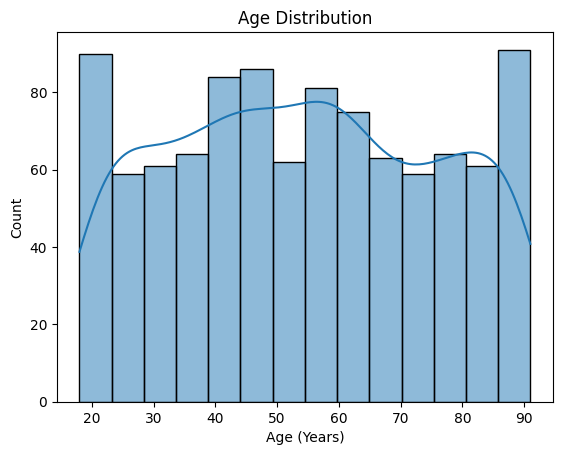

In [12]:
# We have a univariate plot if age with te required number of bins 
import matplotlib.pyplot as plt
age_range = data['Age (Years)'].max() - data['Age (Years)'].min()

def univariate_age_plot(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    fig = sns.histplot(data['Age (Years)'], bins=int(age_range/5), kde=True)
    fig.set_title('Age Distribution')
    age_plot = fig.figure
    plot_name = './univariate_age_plot.png'
    return age_plot, plot_name
univariate_age_plot(data)

(<Figure size 640x480 with 1 Axes>, './univariate_dependant_plot.png')

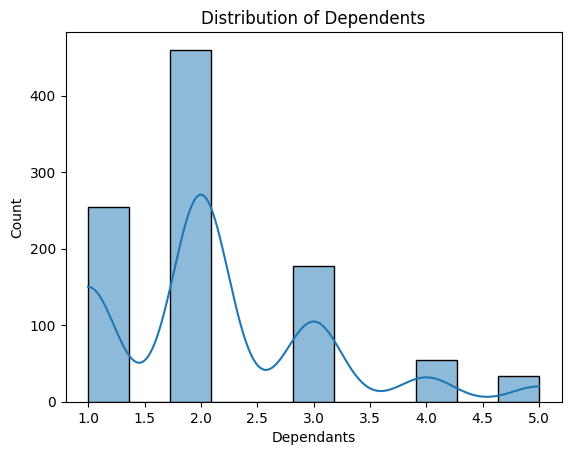

In [13]:

# Here we convert dependants to numeric and plot with the function
def univariate_dependant_plot(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    plt.figure()
    fig = sns.histplot(pd.to_numeric(data['Dependants']),kde = True)
    fig.set_title('Distribution of Dependents')
    dependant_plot = fig.figure
    plot_name = './univariate_dependant_plot.png'
    return dependant_plot, plot_name
univariate_dependant_plot(data)

In [119]:
data['Dependants'].count()

981

(<seaborn.axisgrid.FacetGrid at 0x29f792b5670>,
 './age_conditioned_on_marital_status_plot.png')

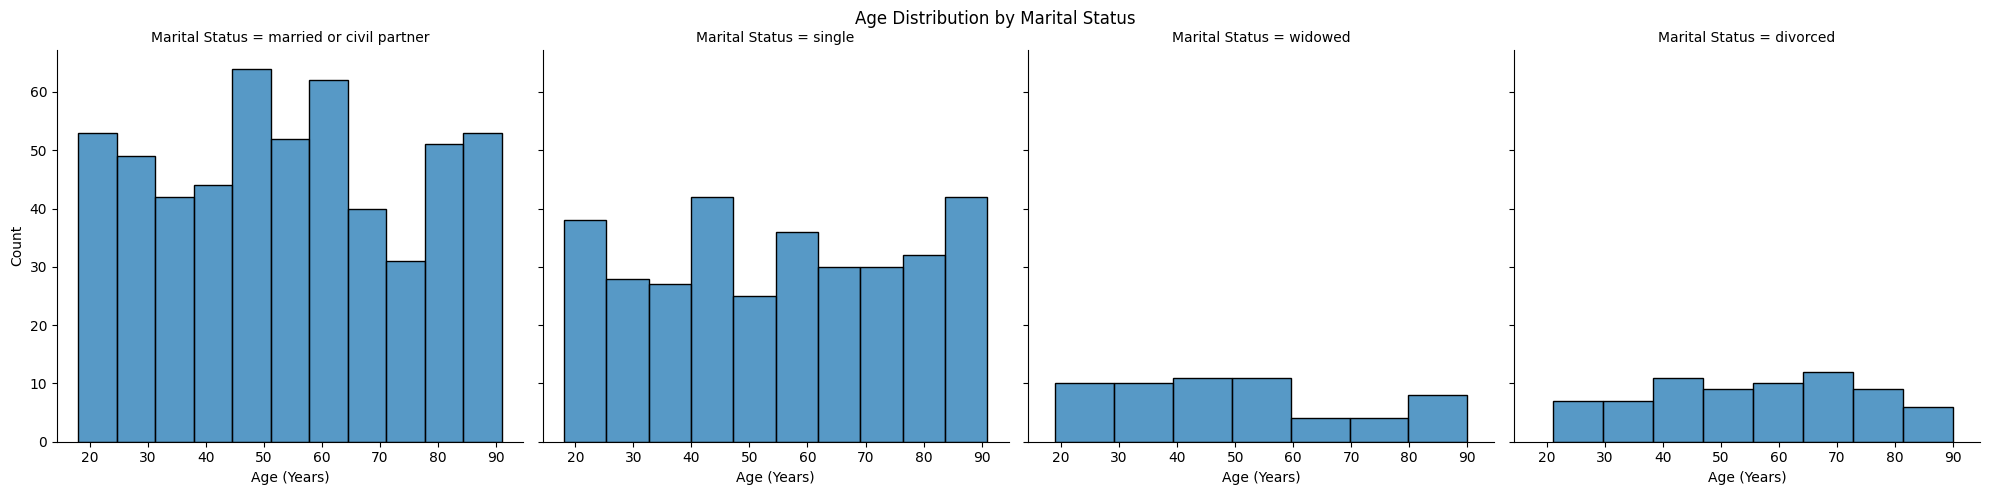

In [14]:
# Ploting the age distribution for each group of Marital Status
def age_conditioned_on_marital_status_plot(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    age_marital_status = sns.FacetGrid(data, col='Marital Status', height=5)
    age_marital_status.map(sns.histplot, 'Age (Years)')
    plt.subplots_adjust(top=0.9)
    age_marital_status.fig.suptitle('Age Distribution by Marital Status')
    plot_name = './age_conditioned_on_marital_status_plot.png'
    return age_marital_status, plot_name
age_conditioned_on_marital_status_plot(data)

***Question 3: Performing multivariate plots***

(<Figure size 1000x500 with 1 Axes>,
 './multivariate_commute_distance_salary.png')

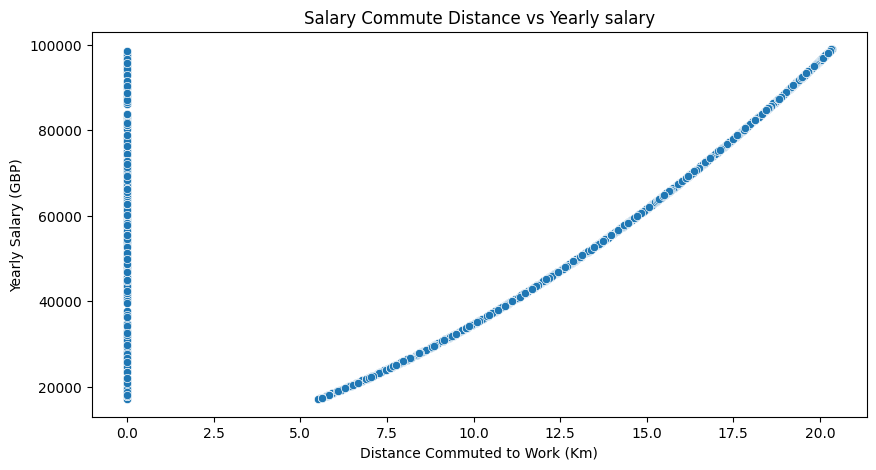

In [15]:
# This is a function that plots the multivariate commute distance vs year salary 
def multivariate_commute_distance_salary(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    plt.figure(figsize=(10,5))
    fig = sns.scatterplot(data=data, x='Distance Commuted to Work (Km)', y='Yearly Salary (GBP)')
    fig.set_title('Salary Commute Distance vs Yearly salary')
    distance_salary_plot = fig.figure
    plot_name = './multivariate_commute_distance_salary.png'
    return distance_salary_plot, plot_name
multivariate_commute_distance_salary(data)

(<Figure size 800x400 with 1 Axes>, './multivariate_age_yearly_salary.png')

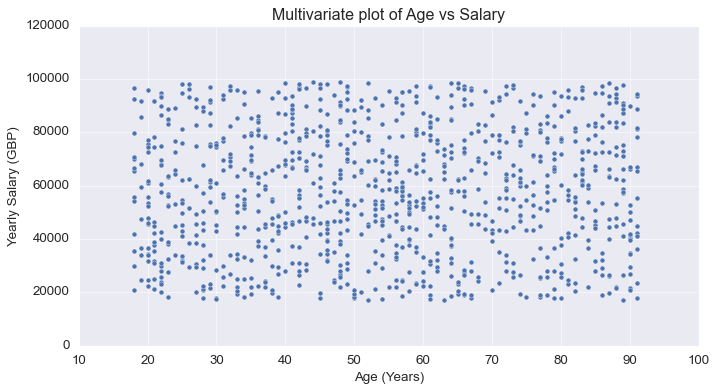

In [148]:
# This is a function that plots the multivariate age vs year salary 
def multivariate_age_yearly_salary(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    plt.figure(figsize=(10,5))
    fig = sns.scatterplot(data=data, x='Age (Years)', y='Yearly Salary (GBP)')
    fig.set_title('Multivariate plot of Age vs Salary')
    age_salary_plot = fig.figure
    plot_name = './multivariate_age_yearly_salary.png'
    return age_salary_plot, plot_name
multivariate_age_yearly_salary(data)

(<seaborn.axisgrid.FacetGrid at 0x125a207ca70>,
 './multivariate_age_salary_cond_dependants.png')

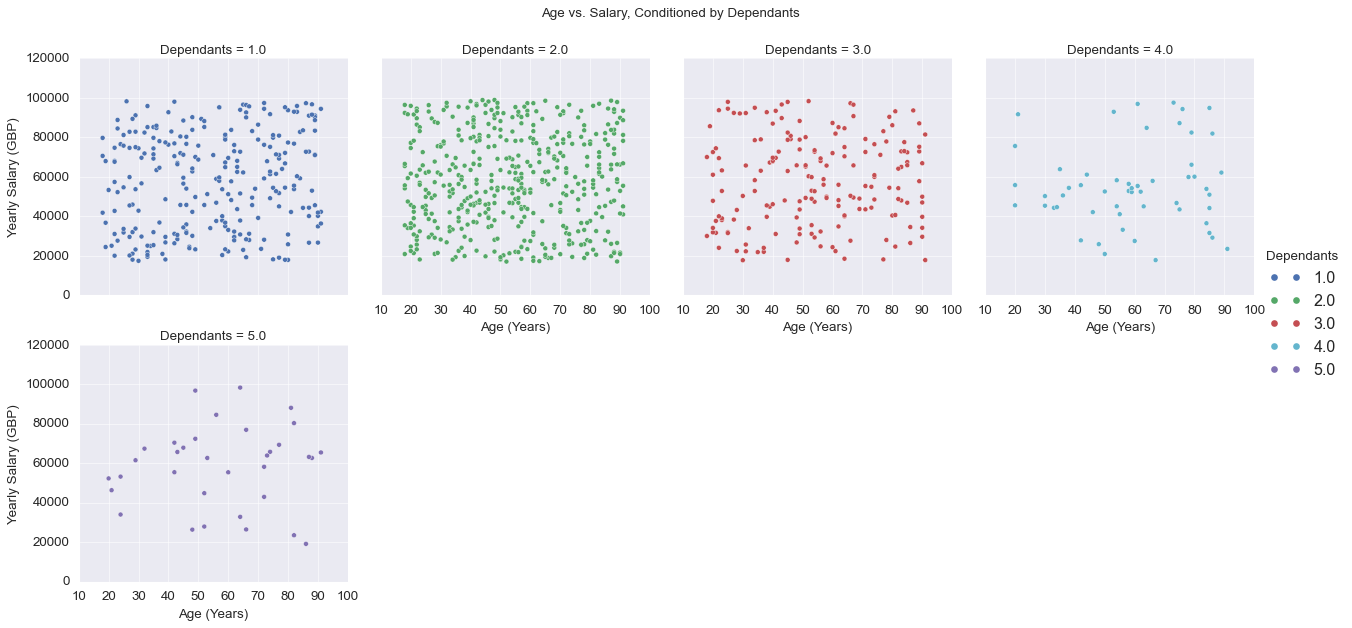

In [123]:
# This is a function that plots the multivariate age vs salary conditioned on dependants
def multivariate_age_salary_cond_dependants(data):
    """
    This function is for plotting our data
    Parameters: data to be ploted
    Returns: The plot object and the plot name which will be used to save the plot later on
    """
    age_salary_dependant = sns.relplot(data=data, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants', kind="scatter", col='Dependants', col_wrap=4, height=4)
    plt.subplots_adjust(top=0.9)
    age_salary_dependant.fig.suptitle('Age vs. Salary, Conditioned by Dependants')
    plot_name = './multivariate_age_salary_cond_dependants.png'
    return age_salary_dependant, plot_name
multivariate_age_salary_cond_dependants(data)

***Question 4*** Here we save all the plots we have produced

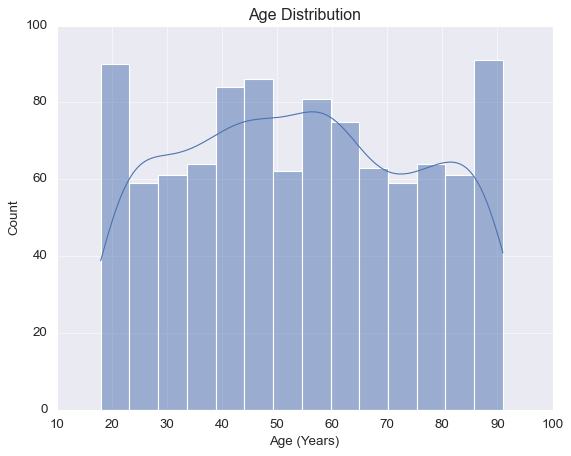

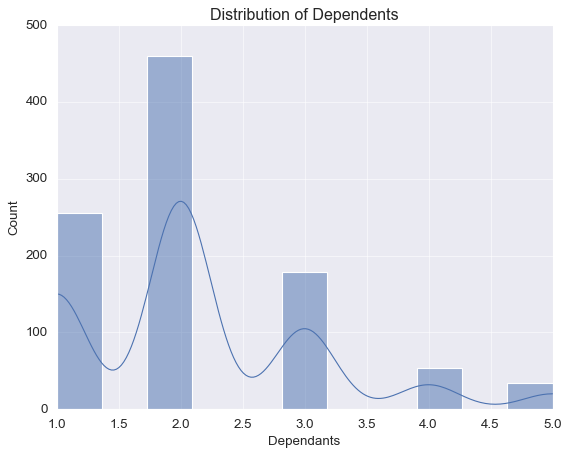

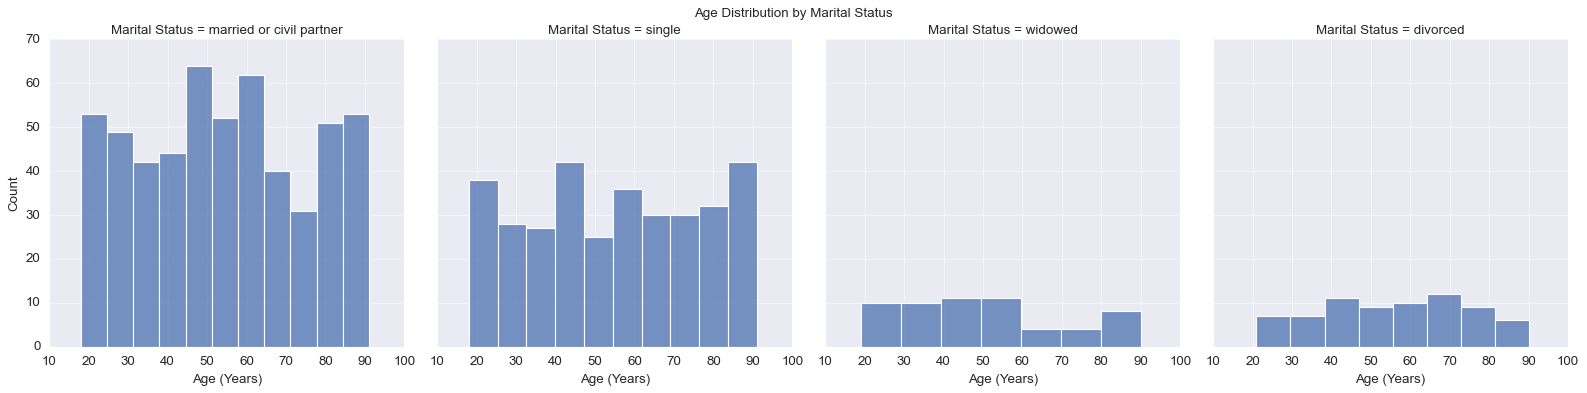

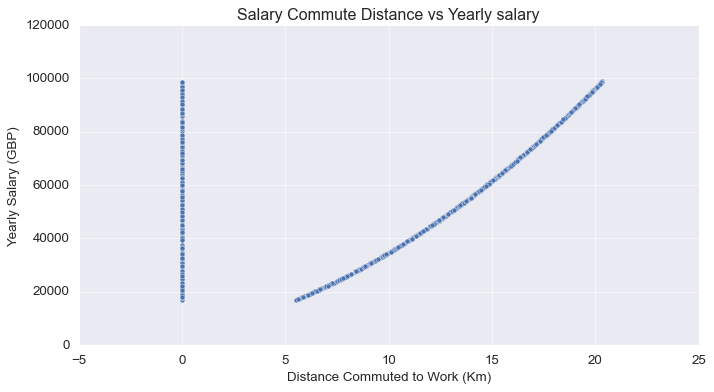

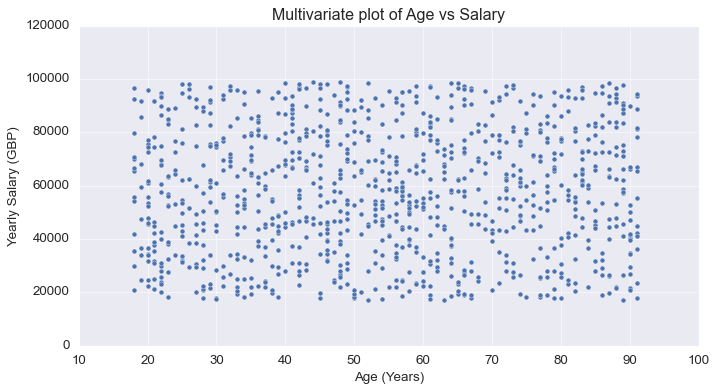

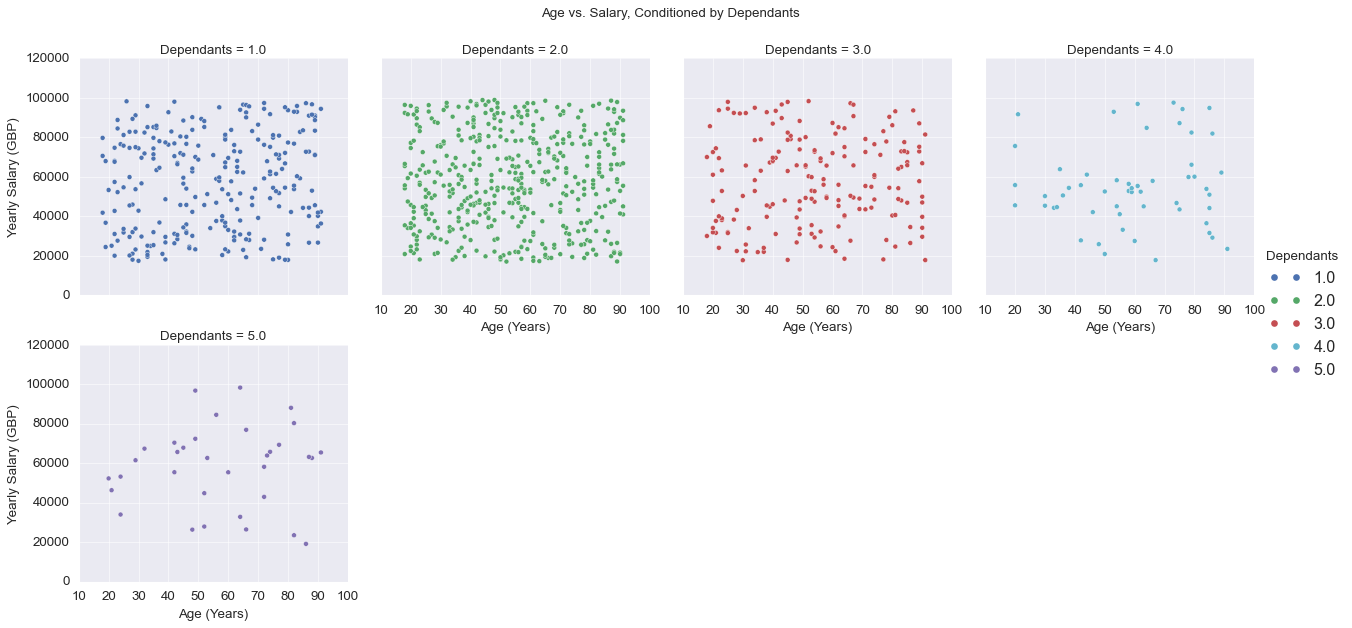

In [157]:
# We start  by calling the plotting functions and assigning their outputs to some variable which we would use later here.
univariate_age_plot_fig, univariate_age_plot_path = univariate_age_plot(data)
univariate_dependant_plot_fig, univariate_dependant_plot_path = univariate_dependant_plot(data)
age_conditioned_on_marital_status_plot_fig, age_conditioned_on_marital_status_plot_path = age_conditioned_on_marital_status_plot(data)
multivariate_commute_distance_salary_fig, multivariate_commute_distance_salary_path = multivariate_commute_distance_salary(data)
multivariate_age_yearly_salary_fig, multivariate_age_yearly_salary_path = multivariate_age_yearly_salary(data)
multivariate_age_salary_cond_dependants_fig, multivariate_age_salary_cond_dependants_path = multivariate_age_salary_cond_dependants(data)


In [158]:
# We first initialise an empty dictionary which we will populate later
figures_to_save = {}
# Populate the dictionary
figures_to_save[univariate_age_plot_path] = univariate_age_plot_fig
figures_to_save[univariate_dependant_plot_path] = univariate_dependant_plot_fig
figures_to_save[age_conditioned_on_marital_status_plot_path] = age_conditioned_on_marital_status_plot_fig
figures_to_save[multivariate_commute_distance_salary_path] = multivariate_commute_distance_salary_fig
figures_to_save[multivariate_age_yearly_salary_path] = multivariate_age_yearly_salary_fig
figures_to_save[multivariate_age_salary_cond_dependants_path] = multivariate_age_salary_cond_dependants_fig

# we loop through the dictionary and save each plot
for filepath, figure in figures_to_save.items():
    figure.savefig(filepath)